In [1]:
import os, sys
import cv2
import torch
import torchvision
import torch.nn.functional as F
import torch.nn as nn
import numpy as np
from glob import glob
import time
import datetime
import imageio

sys.path.append('./models/')
from models.FLAME import FLAME, FLAMETex
from renderer import Renderer

torch.backends.cudnn.benchmark = True

In [2]:
config = {
    # FLAME
    'flame_model_path': './data/generic_model.pkl',  # acquire it from FLAME project page
    'flame_lmk_embedding_path': './data/landmark_embedding.npy',
    'tex_space_path': './data/FLAME_texture.npz',  # acquire it from FLAME project page
    'camera_params': 3,
    'shape_params': 100,
    'expression_params': 50,
    'pose_params': 6,
    'tex_params': 50,
    'use_face_contour': True,

    'cropped_size': 256,
    'batch_size': 1,
    'image_size': 420,
    'e_lr': 0.005,
    'e_wd': 0.0001,
    'savefolder': './test_results/',
    # weights of losses and reg terms
    'w_pho': 8,
    'w_lmks': 1,
    'w_shape_reg': 1e-4,
    'w_expr_reg': 1e-4,
    'w_pose_reg': 0,
}

In [3]:
import util
image_size = 420
device = 'cuda'

config = util.dict2obj(config)
util.check_mkdir(config.savefolder)

mesh_file = './data/head_template_mesh.obj'
render = Renderer(image_size, obj_filename=mesh_file).to(device)


/home/w0457094/anaconda3/envs/flametex/lib/python3.8/site-packages/pytorch3d/io/obj_io.py:457: UserWarning: Mtl file does not exist: ./data/template.mtl
  warnings.warn(f"Mtl file does not exist: {f}")


creating the FLAME Decoder


/home/w0457094/git/photometric_optimization/models/FLAME.py:81: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer('dynamic_lmk_faces_idx', torch.tensor(lmk_embeddings['dynamic_lmk_faces_idx'], dtype=torch.long))
/home/w0457094/git/photometric_optimization/models/FLAME.py:82: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer('dynamic_lmk_bary_coords', torch.tensor(lmk_embeddings['dynamic_lmk_bary_coords'], dtype=self.dtype))


tensor(1., device='cuda:0') tensor(True, device='cuda:0')


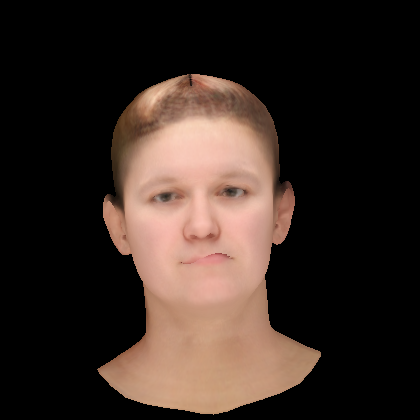

In [18]:
from dataset.sampled_flame_dataset import SampledFlameDataset
# from PIL import Image
import torchvision.transforms as transforms
from models.facecamera import FaceCameraModel

fcm = FaceCameraModel(config=config, render=render, device='cuda')
fcm.set_random()

# dataset = SampledFlameDataset(device='cuda')

# img = transforms.ToPILImage()(dataset[10].detach().cpu())

img, alpha = fcm()
print(alpha.max(), alpha.bool().max())
img = transforms.ToPILImage()(img.detach().cpu()).convert("RGB")

img

TypeError: 'Image' object is not iterable